Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

Generating normal distributions of error for temperatures in the range of 0-35 with 0.5 interval

In [ ]:
temp=[[] for x in range(71)] # Stores all measured temperature values (10^6 values for each marking)
sd = [] #stores sd of all temperature's error distributions
for i in range(71):
    mu = i/2
    sd_ = random.uniform(0.2,0.4)
    sd.append(sd_)
    temp[i] = np.random.normal(mu,sd_,pow(10,6))

Plotting some of them

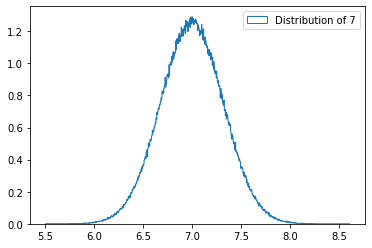

In [ ]:
plt.hist(temp[14],bins=1000,density=True,label="Distribution of 7",histtype="step")
plt.legend()
plt.show()

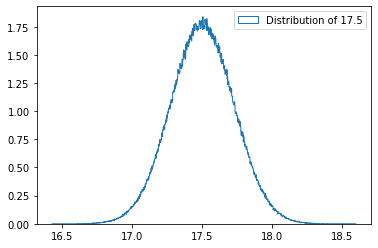

In [ ]:
plt.hist(temp[35],bins=1000,density=True,label="Distribution of 17.5",histtype="step")
plt.legend()
plt.show()

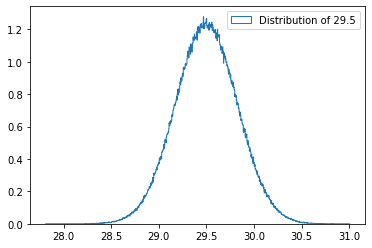

In [ ]:
plt.hist(temp[59],bins=1000,density=True,label="Distribution of 29.5",histtype="step")
plt.legend()
plt.show()

Calculating probability of value being outside accepted range (+-0.5)

In [ ]:
eprob = []  #probability of error
for i in range(71):
    count = 0
    for j in range(pow(10,6)):
        if ((temp[i][j] > (i/2+0.5)) or (temp[i][j] < (i/2-0.5))):
            count = count + 1
    eprob.append(count/pow(10,6))
#print(eprob)
# print(eprob[14],eprob[35],eprob[59],max(eprob),min(eprob),sd[eprob.index(min(eprob))])

Plotting the probability of errors being greater than accepted range.

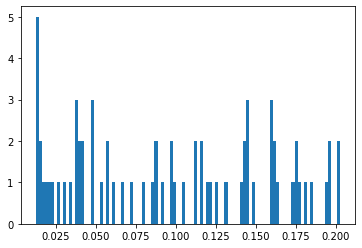

In [ ]:
plt.hist(eprob,bins=100)
plt.show()

Generating values for probabilities of true temperatures and cost of their errors

In [ ]:
prob=[0 for x in range(71)]   # Stores the probability of a true temperature occurring
cost=[0 for x in range(71)]   # Stores the cost of error for each temperature
for i in range(71):
    if i>=20 and i<=50:
        prob[i] = random.uniform(7,10)     # More probability is given to temperatures in the middle of the range, decreases gradually
    elif i<10 or i>60:
        prob[i] = random.uniform(1,4)
    else:
        prob[i] = random.uniform(4,7)

sum = 0
for i in range(71):
    sum = sum + prob[i]
for i in range(71):         #Normalizing the probabilities
    prob[i] = prob[i]/sum

for i in range(71):
    if i>=20 and i<=50:
        cost[i] = random.uniform(1,4)
    elif i<10 or i>60:
        cost[i] = random.uniform(7,10)    # More cost is assigned for errors at extremes, decreases gradually
    else:                                 # Cost is of some arbitary unit
        cost[i] = random.uniform(4,7)

# print(prob)
# print(cost)

Calculating the required probabilities and cost

In [ ]:
prob_e = 0
for i in range(71):
    prob_e = prob_e + eprob[i]*prob[i]
print("The probability of an error happening is: ")
print(prob_e)
exp_cost = 0
for i in range(71):
    exp_cost = exp_cost + eprob[i]*prob[i]*cost[i]
print("The expected cost is: ")
print(exp_cost)

The probability of an error happening is: 
0.10161224369005523
The expected cost is: 
0.4054343370895256
